<a href="https://colab.research.google.com/github/vasilievan/telecom_labs/blob/main/Vasiliev_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2022-03-05 20:37:34--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-03-05 20:37:35--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.009s  

2022-03-05 20:37:35 (4.89 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



In [ ]:
from thinkdsp import decorate

# Упражнение № 1

In [ ]:
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
import numpy as np

class SawtoothSignal(Sinusoid):
    
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi * 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys
saw = SawtoothSignal().make_wave(duration=0.5, framerate=40000)
saw.make_audio()

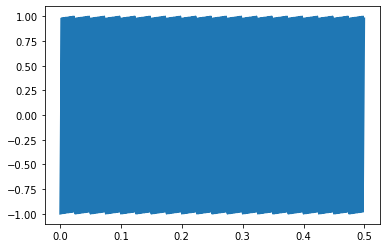

In [ ]:
saw.plot()

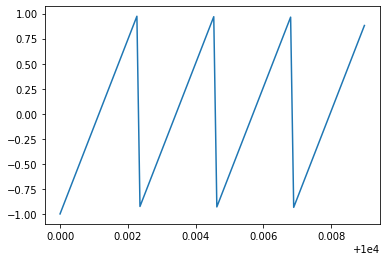

In [ ]:
signal = SawtoothSignal()
duration = signal.period*4
segment = signal.make_wave(duration, 10000)
segment.plot()

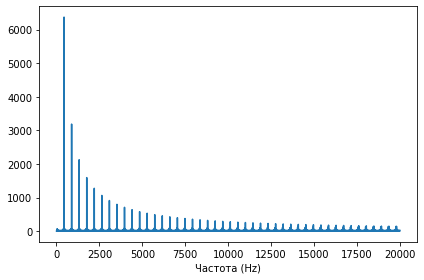

In [ ]:
saw.make_spectrum().plot()
decorate(xlabel='Частота (Hz)')

Прямоугольный сигнал

Прямоугольный сигнал и пилообразный сигнал затухают, но второй включает в себя как четные, так и нечетные гармоники. При сокращении в 2 раза амплитуды прямоугольного сигнала, мы можем наблюдать, как пилообразный сигнал дополняет прямоугольный до своего спректра, делая сравнимым.

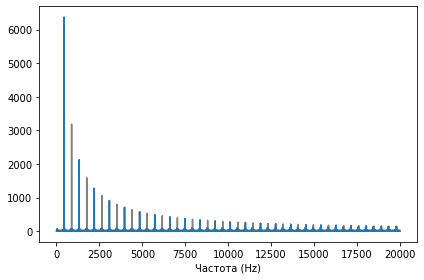

In [ ]:
from thinkdsp import SquareSignal

saw.make_spectrum().plot(color='gray')
square = SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
square.make_spectrum().plot()
decorate(xlabel='Частота (Hz)')

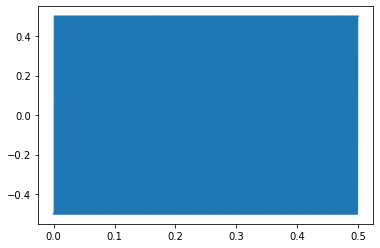

In [ ]:
square.plot()

In [ ]:
square.make_audio()

Треугольный сигнал

Как мы можем видеть на спектре у треугольного сигнала затухание происходит быстрее, чем у пилообразного. Треугольный
сигнал падает пропорционально 1/ f^2, а пилообразный - 1/ f .

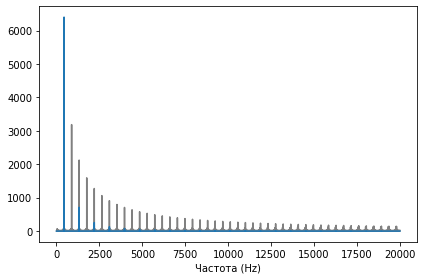

In [ ]:
from thinkdsp import TriangleSignal

saw.make_spectrum().plot(color='gray')
triangle = TriangleSignal(amp=0.79).make_wave(duration=0.5, framerate=40000)
triangle.make_spectrum().plot()
decorate(xlabel='Частота (Hz)')

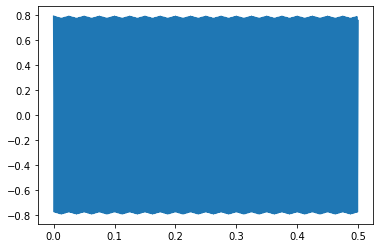

In [ ]:
triangle.plot()

In [ ]:
triangle.make_audio()

# Упражнение № 2

Создадим квадратный сигнал с частотой 1100 Hz и с выборкой кадров в секунду 10000 Построим график спекрта и воспроизведем звук.

In [ ]:
square = SquareSignal(1100).make_wave(duration=0.5, framerate=10000)

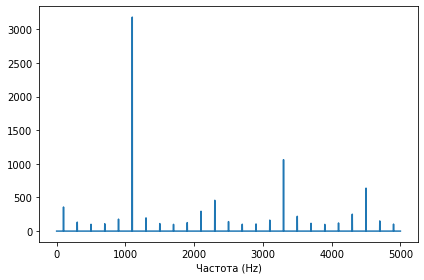

In [ ]:
square.make_spectrum().plot()
decorate(xlabel='Частота (Hz)')

In [ ]:
square.make_audio()

Как видно из графика, первая гармоника находится в нужном месте. А вот вторая гармоника (5500Hz) совмещена с гармоникой 4500Hz. Следующая гармоника совмещена с гармоникой на 2300Hz.

# Упражнение № 3

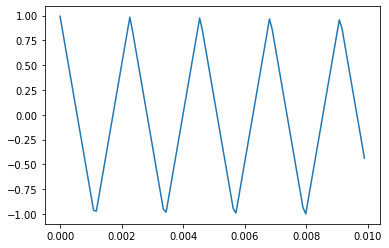

In [ ]:
triangle = TriangleSignal().make_wave(duration=0.01)
triangle.plot()

In [ ]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

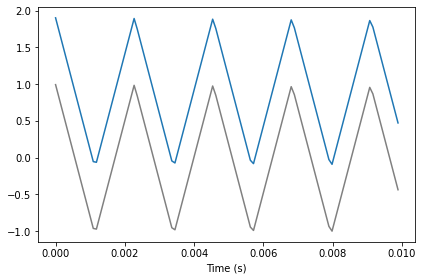

In [ ]:
spectrum.hs[0] = 100
triangle.plot(color='gray')
spectrum.make_wave().plot()
decorate(xlabel='Time (s)')

Как видно из полученного графика, сигнал сместился по вертикали. То есть первый элемент массив hs отвечает за смещение сигнали относительно вертикали. Если элемент близок или равен нулю, сигнал не смещенный.

# Упражнение № 4

In [ ]:
def div_spectrum(spectrum):
    spectrum.hs /= spectrum.fs
    spectrum.hs[0] = 0
    spectrum.plot()

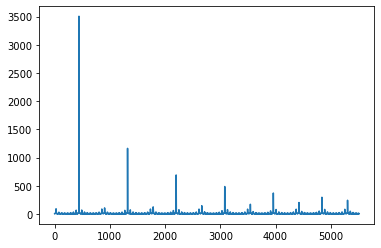

In [ ]:
w = SquareSignal(freq=440).make_wave(duration=0.5)
spec = w.make_spectrum()
spec.plot()
w.make_audio()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


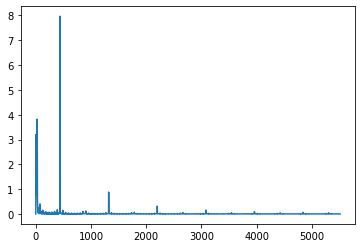

In [ ]:
div_spectrum(spec)

In [ ]:
filtered = spec.make_wave()
filtered.make_audio()

Если сравнить полученные графики, можно сделать вывод, что функция действует как фильтр низких частот: частоты ослабляются на некоторую величину. Если сравнить две полученных звука на слух, то второй звучит более чисто, из-за отсутсвия низких часот, похож на звук синусоидального сигнала.

# Упражнение № 5

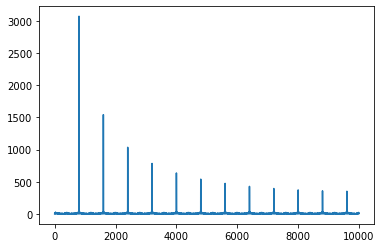

In [ ]:
signal = SawtoothSignal(800)
wave = signal.make_wave(duration=0.5, framerate=20000)
spec = wave.make_spectrum()
spec.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


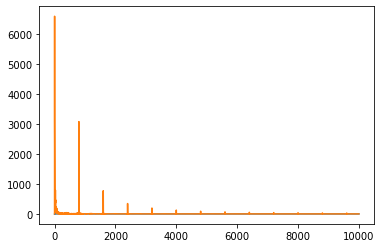

In [ ]:
div_spectrum(spec)
spec.scale(800)
spec.plot()

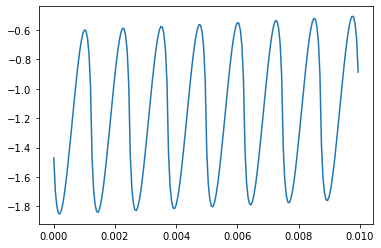

In [ ]:
spec.make_wave().segment(duration=0.01).plot()

Как видно из графиков, полученных после обработки сигнала, спектр спадает пропорционально 1/f^2 и при этом имеет четные и нечетные графики. Как видно из последнего графика, сигнал перестал быть пилообразным, но и не превратился в синусоиадальный.